In [1]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

In [2]:
import tweepy
import pandas as pd
import numpy as np
#from IPython.display import display 
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [3]:
#My Twitter API Authentication Variables

consumer_key = 'lxrmC2IN4GYb1ZN4NfD3Tf8Gz'
consumer_secret = 'emTlpALk2a9R0ffoyfyj5A73aFt9nE2lU4MnQrELr7VWMJGHLr'
access_token = '3020825006-yA4l1d35uGwZmnjYpZkDy8ciMnm0vVGkVvwTMtO'
access_token_secret = 'vdFLOF7b02cnEOnagb1N6bCexmFXDlDpJ91dwV5NmkYg9'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('Machine Learning', count = 200)

data = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweets'])

display(data.head(10))

print(tweets[0].created_at)


,Tweets
0,RT @MIT_CSAIL: The 10 most helpful *free* onli...
1,RT @MIT_CSAIL: The 10 most helpful *free* onli...
2,RT @Science59109766: #awesome... #AWS is build...
3,RT @mlmemoirs: RT @SwissCognitive: #AI #Arts\n...
4,RT @shakir_za: Really excited to share our lat...
5,RT @SwissCognitive: #AI #Arts\nThe uncanny cap...
6,RT @TwitterU: Are you interested in a 2020 PhD...
7,"RT @kdnuggets: Top Stories, Jul 29 – Aug 4: To..."
8,RT @into_AI: AnchorPredictive Analytics and Ma...
9,Investing in Economies with Machine Learning h...


2019-08-05 18:36:17


In [6]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shubmath/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
sid = SentimentIntensityAnalyzer()

list = []

for index, row in data.iterrows():
    ss = sid.polarity_scores(row['Tweets'])
    list.append(ss)
    
se = pd.Series(list)

data['Polarity'] = se.values

display(data.head(10))


,Tweets,Polarity
0,RT @MIT_CSAIL: The 10 most helpful *free* onli...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp..."
1,RT @MIT_CSAIL: The 10 most helpful *free* onli...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp..."
2,RT @Science59109766: #awesome... #AWS is build...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,RT @mlmemoirs: RT @SwissCognitive: #AI #Arts\n...,"{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp..."
4,RT @shakir_za: Really excited to share our lat...,"{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compou..."
5,RT @SwissCognitive: #AI #Arts\nThe uncanny cap...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp..."
6,RT @TwitterU: Are you interested in a 2020 PhD...,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp..."
7,"RT @kdnuggets: Top Stories, Jul 29 – Aug 4: To...","{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp..."
8,RT @into_AI: AnchorPredictive Analytics and Ma...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,Investing in Economies with Machine Learning h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [8]:
display(data)

,Tweets,Polarity
0,RT @MIT_CSAIL: The 10 most helpful *free* onli...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp..."
1,RT @MIT_CSAIL: The 10 most helpful *free* onli...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp..."
2,RT @Science59109766: #awesome... #AWS is build...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,RT @mlmemoirs: RT @SwissCognitive: #AI #Arts\n...,"{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp..."
4,RT @shakir_za: Really excited to share our lat...,"{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compou..."
5,RT @SwissCognitive: #AI #Arts\nThe uncanny cap...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp..."
6,RT @TwitterU: Are you interested in a 2020 PhD...,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp..."
7,"RT @kdnuggets: Top Stories, Jul 29 – Aug 4: To...","{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp..."
8,RT @into_AI: AnchorPredictive Analytics and Ma...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,Investing in Economies with Machine Learning h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [9]:
data.head()
type(data.Tweets)

pandas.core.series.Series

In [10]:
type(data.Polarity)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Tweets      100 non-null object
Polarity    100 non-null object
dtypes: object(2)
memory usage: 1.6+ KB


In [11]:
data[data.isnull().any(axis=1)].head()
data.isnull().any(axis=0)

Tweets      False
Polarity    False
dtype: bool

In [12]:
#we print the 5 most recent tweets
print('5 recent tweets: \n')
for tweet in tweets[:5]:
    
    print(tweet.text)
    print()

    


5 recent tweets: 

RT @MIT_CSAIL: The 10 most helpful *free* online machine learning courses, via @chipro. 

Full thread: https://t.co/RUcG2AL1uC

#MondayMoti…

RT @MIT_CSAIL: The 10 most helpful *free* online machine learning courses, via @chipro. 

Full thread: https://t.co/RUcG2AL1uC

#MondayMoti…

RT @Science59109766: #awesome... #AWS is building small #AI racing cars to #teach #MachineLearning

#tech #technology
#science #engineering…

RT @mlmemoirs: RT @SwissCognitive: #AI #Arts
The uncanny capability of the machine learning algorithms to improve through transfer learning…

RT @shakir_za: Really excited to share our latest paper in @nature today on machine learning for health data to make early predictions of a…



In [13]:
for index, row in data.iterrows():
    ss = sid.polarity_scores(row['Tweets'])
    list.append(ss)

In [14]:
#join tweets to a single string
words = ' '.join(data['Tweets'])
print(words)

RT @MIT_CSAIL: The 10 most helpful *free* online machine learning courses, via @chipro. 

Full thread: https://t.co/RUcG2AL1uC

#MondayMoti… RT @MIT_CSAIL: The 10 most helpful *free* online machine learning courses, via @chipro. 

Full thread: https://t.co/RUcG2AL1uC

#MondayMoti… RT @Science59109766: #awesome... #AWS is building small #AI racing cars to #teach #MachineLearning

#tech #technology
#science #engineering… RT @mlmemoirs: RT @SwissCognitive: #AI #Arts
The uncanny capability of the machine learning algorithms to improve through transfer learning… RT @shakir_za: Really excited to share our latest paper in @nature today on machine learning for health data to make early predictions of a… RT @SwissCognitive: #AI #Arts
The uncanny capability of the machine learning algorithms to improve through transfer… https://t.co/8TM3qfucFJ RT @TwitterU: Are you interested in a 2020 PhD Research Fellowship working on a Machine Learning team @Twitter?
 
We are looking for you! #… RT @kdnuggets

In [15]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [16]:
#remove URLs, RTs, and twitter handles 
no_urls_no_tags = ' '.join([word for word in words.split()
                           if 'http' not in word
                            and not word.startswith('@')
                            and word != 'RT'
                           ])

In [17]:
wordcloud = WordCloud(
                font_path = '/Users/shubmath/anaconda3/lib/python3.7/site-packages/wordcloud/CabinSketch-Bold.ttf',
                stopwords = STOPWORDS,
                background_color = 'black',
                width = 1800,
                height = 1400
                ).generate(no_urls_no_tags)

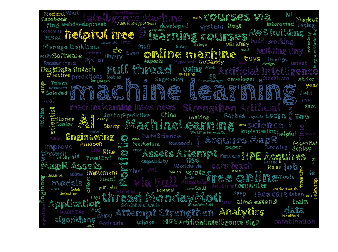

In [20]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
from scipy.misc import imread

#use a twitter logo as a mask
twitter_mask = imread('/Users/shubmath/twitter_mask.png', flatten = True)

wordcloud = WordCloud(
                font_path = '/Users/shubmath/anaconda3/lib/python3.7/site-packages/wordcloud/CabinSketch-Bold.ttf',
                stopwords = STOPWORDS,
                background_color = 'white',
                width = 1000,
                height = 1000,
                mask = twitter_mask, 
                ).generate(no_urls_no_tags)


/Users/shubmath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/Users/shubmath/anaconda3/lib/python3.7/site-packages/wordcloud/wordcloud.py:721: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


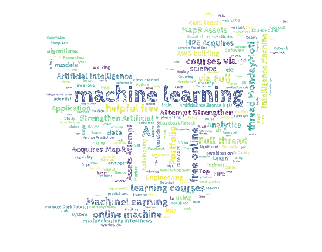

In [22]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()